In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle

data = pd.read_csv('Final_Data_Set.csv')

data = data[(data['bmi'] > 14) & (data['bmi'] < 60)]

# 2. Separate features and target
X = data.drop('cardio', axis=1)
y = data['cardio']

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# 4. Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler to use in your UI later
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [14]:
# 5. Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 6. Evaluate
y_pred = rf_model.predict(X_test_scaled)
print(f"Improved Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(classification_report(y_test, y_pred))

Improved Accuracy: 73.34%
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6880
           1       0.76      0.68      0.72      6828

    accuracy                           0.73     13708
   macro avg       0.74      0.73      0.73     13708
weighted avg       0.74      0.73      0.73     13708



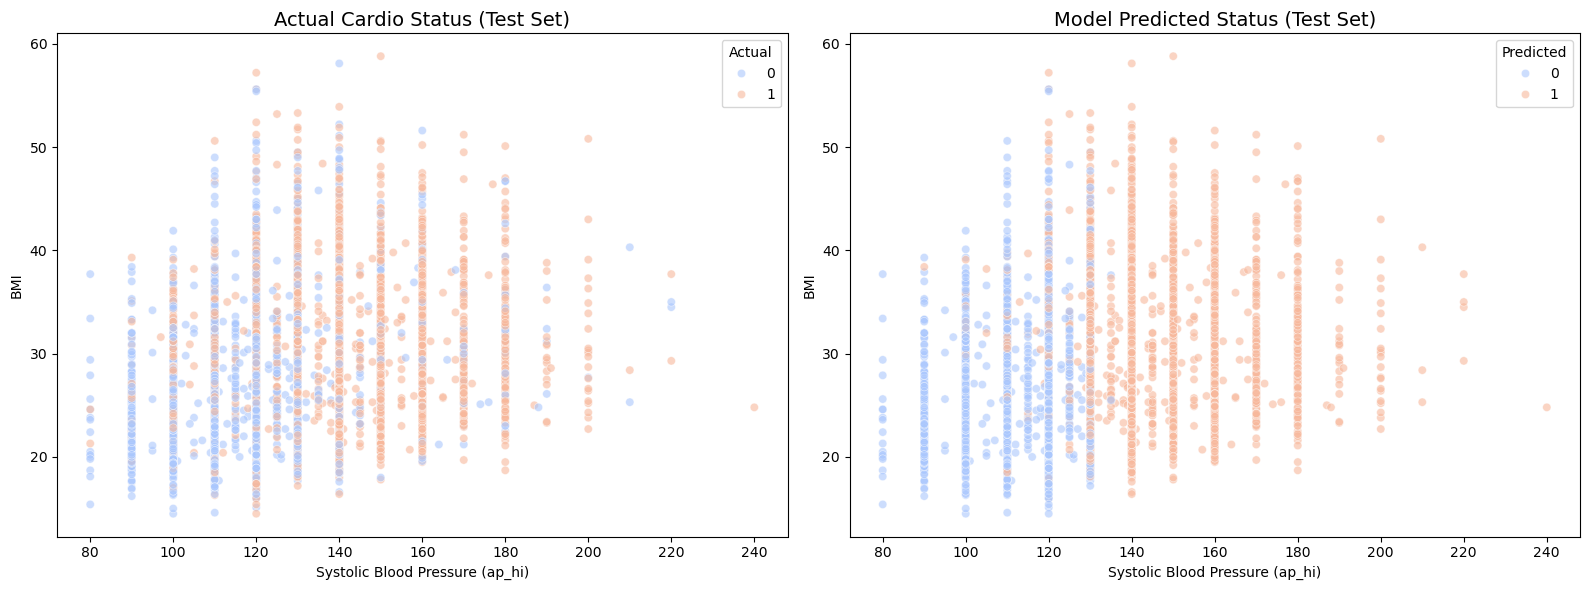

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = X_test.copy()
plot_df['Actual'] = y_test.values
plot_df['Predicted'] = y_pred

plt.figure(figsize=(16, 6))

# Plot 1: Actual Data Points
plt.subplot(1, 2, 1)
sns.scatterplot(data=plot_df, x='ap_hi', y='bmi', hue='Actual', 
                palette='coolwarm', alpha=0.6)
plt.title('Actual Cardio Status (Test Set)', fontsize=14)
plt.xlabel('Systolic Blood Pressure (ap_hi)')
plt.ylabel('BMI')

# Plot 2: Predicted Data Points
plt.subplot(1, 2, 2)
sns.scatterplot(data=plot_df, x='ap_hi', y='bmi', hue='Predicted', 
                palette='coolwarm', alpha=0.6)
plt.title('Model Predicted Status (Test Set)', fontsize=14)
plt.xlabel('Systolic Blood Pressure (ap_hi)')
plt.ylabel('BMI')

plt.tight_layout()
plt.show()

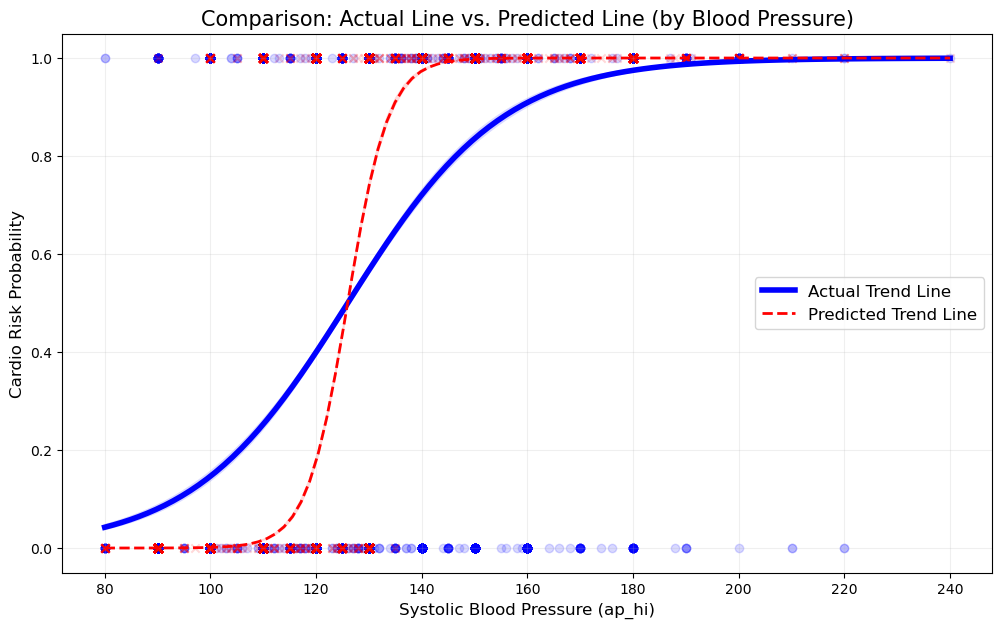

In [16]:
plt.figure(figsize=(12, 7))

# 1. Actual points and Actual trend line (Solid Blue)
sns.regplot(x=X_test['ap_hi'], y=y_test, color='blue', 
            scatter_kws={'alpha':0.15}, 
            line_kws={'label': 'Actual Trend Line', 'linewidth': 4}, 
            logistic=True)

# 2. Predicted points and Predicted trend line (Dashed Red)
sns.regplot(x=X_test['ap_hi'], y=y_pred, color='red', marker='x',
            scatter_kws={'alpha':0.15}, 
            line_kws={'label': 'Predicted Trend Line', 'linestyle': '--', 'linewidth': 2}, 
            logistic=True)

plt.title('Comparison: Actual Line vs. Predicted Line (by Blood Pressure)', fontsize=15)
plt.xlabel('Systolic Blood Pressure (ap_hi)', fontsize=12)
plt.ylabel('Cardio Risk Probability', fontsize=12)
plt.legend(prop={'size': 12})
plt.grid(True, alpha=0.2)
plt.show()

In [17]:
data

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
0,2,110,80,1,1,0,0,1,0,50,22.0
1,1,140,90,3,1,0,0,1,1,55,34.9
2,1,130,70,3,1,0,0,0,1,52,23.5
3,2,150,100,1,1,0,0,1,1,48,28.7
4,1,100,60,1,1,0,0,0,0,48,23.0
...,...,...,...,...,...,...,...,...,...,...,...
68606,2,120,80,1,1,1,0,1,0,53,26.9
68607,1,140,90,2,2,0,0,1,1,62,50.5
68608,2,180,90,3,1,0,1,0,1,52,31.4
68609,1,135,80,1,2,0,0,0,1,61,27.1
